In [60]:
# načtení dat
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# reading the CSV file
data = pd.read_csv('All_N_rex 5 nm SR 895.csv', sep = ';', header = 0)
df = pd.DataFrame(data)

# vyber kompletnich
df.dropna(axis = 0, how = 'any', inplace = True)

# ulozim si labely abych je pak mohla nalepit
ROI = df.loc[:,"ROI name"]

# odstranim ty popisky
df= df.drop(columns = ['ROI name'])

# pruzkum sloupcu - ktere jsou vadne
"""for i in range(df.shape[1]):
    try:
        df.loc[:,df.columns[i]].astype(float)
    except ValueError as ve:
        print(df.columns[i])
 skoro vsechny - podivala jsem se v R u nekterych techu jsou tady hodnoty I.97... asi jsou to chybné values, vyhodim je, pak se zeptam Renci"""

 # pruzkum radku - ktere jsou vadne
bad_row = []
bad_row_counter = 0
for i in range(df.shape[0]):
    try:
        df.loc[i,:].astype(float)
    except ValueError as ve:
        bad_row_counter += 1
        bad_row.append(i)

"""86 radku obsahuje tady tuto chybu => vyhodim tyto radky (overime pak, jestli muzu)"""

# prilepit zpatky ROI

df['ROI'] = ROI

# odhodit radky kde je divnotyp
df = df.drop(bad_row)

# pretypovat
for i in range(3,97):
    try:
        df.loc[:,df.columns[i]] = df.loc[:,df.columns[i]].astype(float)
    except ValueError as ve:
        print(df.columns[i])

# rozdelit na barvicky
blue = df.loc[df['ROI'] == 'blue']
green = df.loc[df['ROI'] == 'green']
dry = df.loc[df['ROI'] == 'dry']
tech = df.loc[df['ROI'] == 'tech']
soil = df.loc[df['ROI'] == 'soil']

blue= blue.drop(columns = ['ROI'])
dry= dry.drop(columns = ['ROI'])
green= green.drop(columns = ['ROI'])
tech= tech.drop(columns = ['ROI'])
soil= soil.drop(columns = ['ROI'])



C:\Users\h337\AppData\Local\Temp/ipykernel_7548/2485449880.py:12: DtypeWarning: Columns (6,8,10,11,12,16,17,19,20,23,24,25,27,29,33,34,36,38,39,40,41,42,43,44,48,49,50,53,54,55,56,58,59,60,61,63,64,65,68,69,73,74,75,76,79,81,82,83,84,85,86,88,89,90,91,92,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('All_N_rex 5 nm SR 895.csv', sep = ';', header = 0)
C:\Users\h337\AppData\Local\Temp/ipykernel_7548/2485449880.py:54: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,df.columns[i]] = df.loc[:,df.columns[i]].astype(float)


In [31]:
# model pro všechny proměnné
output = df['ROI']
input = df.loc[:, ~df.columns.isin(['Tray', 'ROI'])]

X_train, X_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state=42)

dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc


0.9623284955190736

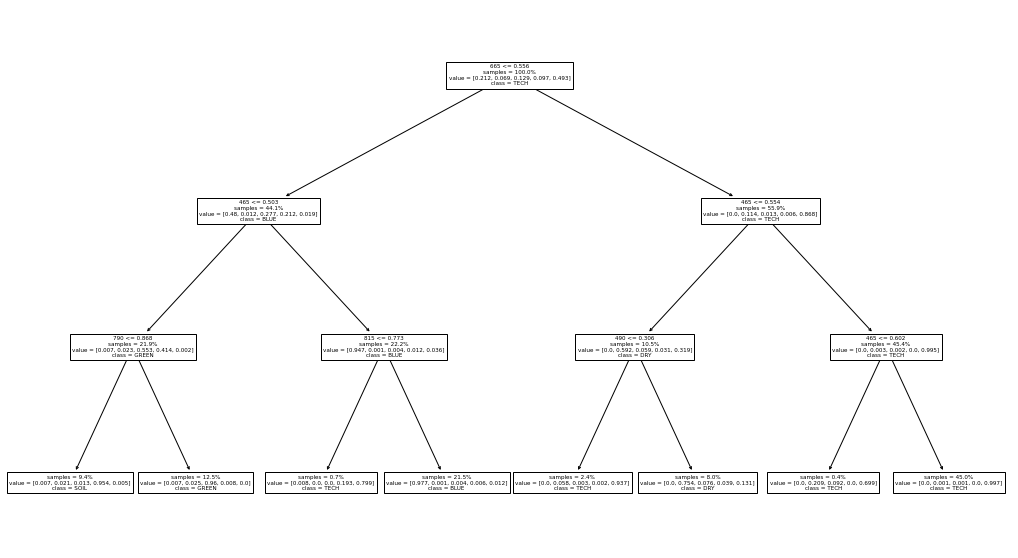

In [59]:
fig = plt.figure(figsize=((18,10)))
plot_tree(dtree,
            class_names= ['BLUE','DRY', 'GREEN', 'SOIL', 'TECH'],
            feature_names= X_train.columns,
            impurity=False,
            proportion=True,
            filled=False)

fig.savefig('DT.jpg')

In [57]:
from sklearn import tree
print(tree.export_text(dtree))

|--- feature_9 <= 0.56
|   |--- feature_1 <= 0.50
|   |   |--- feature_14 <= 0.87
|   |   |   |--- class: soil
|   |   |--- feature_14 >  0.87
|   |   |   |--- class: green
|   |--- feature_1 >  0.50
|   |   |--- feature_15 <= 0.77
|   |   |   |--- class: tech
|   |   |--- feature_15 >  0.77
|   |   |   |--- class: blue
|--- feature_9 >  0.56
|   |--- feature_1 <= 0.55
|   |   |--- feature_2 <= 0.31
|   |   |   |--- class: tech
|   |   |--- feature_2 >  0.31
|   |   |   |--- class: dry
|   |--- feature_1 >  0.55
|   |   |--- feature_1 <= 0.60
|   |   |   |--- class: tech
|   |   |--- feature_1 >  0.60
|   |   |   |--- class: tech



In [65]:
# bez souřadnic
output = df['ROI']
input2 = df.loc[:, ~df.columns.isin(['Tray', 'ROI', 'File X', 'File Y'])]

X_train, X_test, y_train, y_test = train_test_split(input2, output, test_size = 0.3, random_state=42)

dtree2 = DecisionTreeClassifier(max_depth=3)
dtree2.fit(X_train, y_train)
predicitions = dtree2.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc


0.9623284955190736

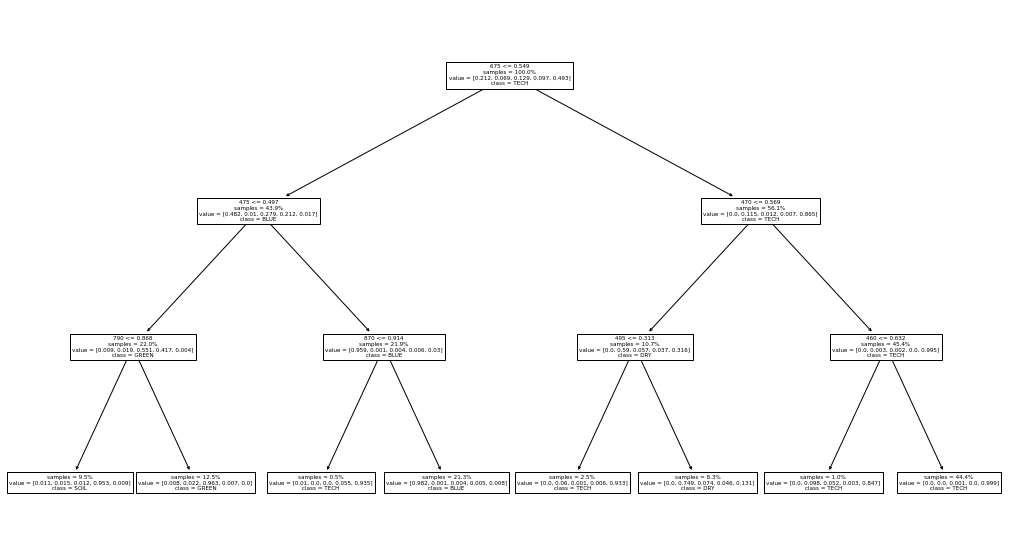

In [66]:
fig = plt.figure(figsize=((18,10)))
plot_tree(dtree2,
            class_names= ['BLUE','DRY', 'GREEN', 'SOIL', 'TECH'],
            feature_names= X_train.columns,
            impurity=False,
            proportion=True,
            filled=False)

fig.savefig('DT2.jpg')

In [71]:
# každá pátá vlnová délka
input3 = input.iloc[:,range(2, input.shape[1], 5)]

X_train, X_test, y_train, y_test = train_test_split(input3, output, test_size = 0.3, random_state=42)

dtree3 = DecisionTreeClassifier(max_depth=3)
dtree3.fit(X_train, y_train)
predicitions = dtree3.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc

0.9629233087477199

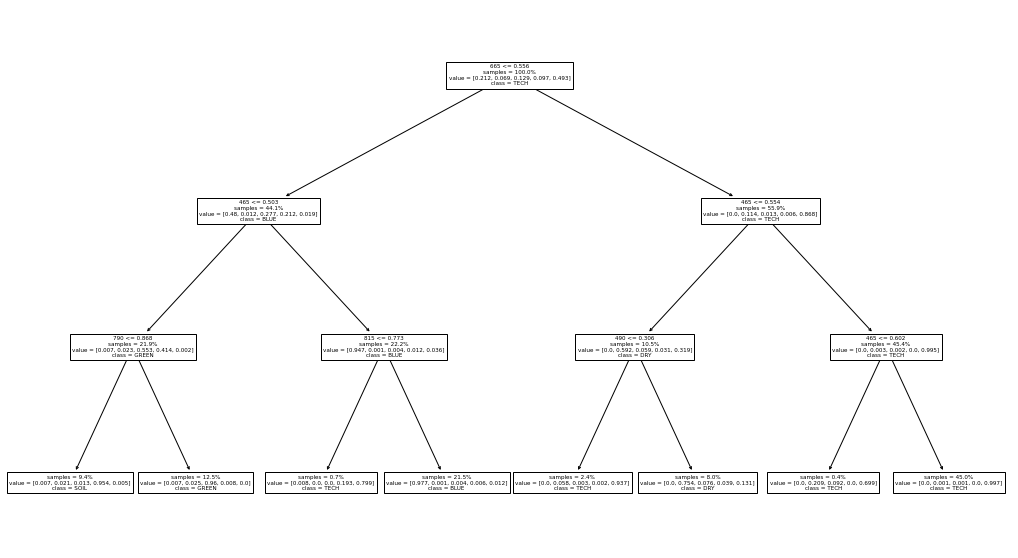

In [72]:
fig = plt.figure(figsize=((18,10)))
plot_tree(dtree3,
            class_names= ['BLUE','DRY', 'GREEN', 'SOIL', 'TECH'],
            feature_names= X_train.columns,
            impurity=False,
            proportion=True,
            filled=False)

fig.savefig('DT3.jpg')

In [69]:
# každá desátá vlnová délka
input4 = input.iloc[:,range(2, input.shape[1], 10)]

X_train, X_test, y_train, y_test = train_test_split(input4, output, test_size = 0.3, random_state=42)

dtree4 = DecisionTreeClassifier(max_depth=3)
dtree4.fit(X_train, y_train)
predicitions = dtree4.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc

0.885994131176144

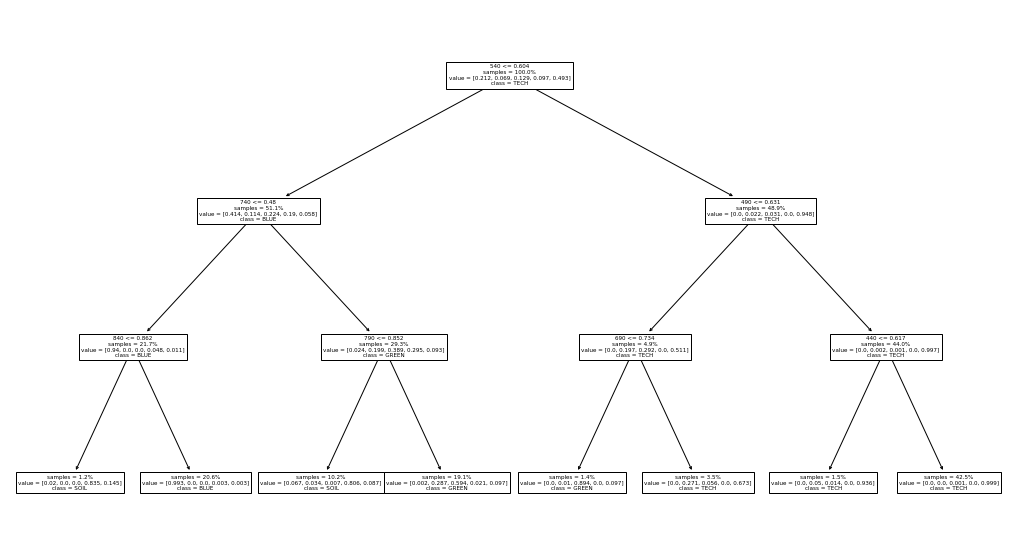

In [70]:
fig = plt.figure(figsize=((18,10)))
plot_tree(dtree4,
            class_names= ['BLUE','DRY', 'GREEN', 'SOIL', 'TECH'],
            feature_names= X_train.columns,
            impurity=False,
            proportion=True,
            filled=False)

fig.savefig('DT4.jpg')